# Lab 1 - Pittsburgh Trees
Trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division.

Source: [City of Pittsburgh](https://catalog.data.gov/dataset/city-of-pittsburgh-trees)

## Setup

In [75]:
# Install
# install.packages("dplyr")
# install.packages("tidyverse")
# install.packages("dslabs")
# install.packages("vtreat")

In [3]:
# Libraries
library(dplyr)
library(tidyverse)
library(dslabs)
library(vtreat)

## Read in Data

In [4]:
trees_raw <- read_csv('../datasets/pittsburgh_trees.csv', col_types = cols(.default = col_guess(), street = col_character()))

head(trees_raw)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for
details, e.g.:
  dat <- vroom(...)
  problems(dat)”


_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,⋯,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,754166088,7428,MONTICELLO ST,Stump,Stump,0,0,10,2,⋯,Homewood North,9,13,42003130200,2,13,5,3-17,40.45817,-79.88972
2,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0,0,99,99,⋯,Oakwood,2,28,42003562800,5,28,6,1-19,40.42927,-80.06787
3,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22,6,6,3,⋯,South Side Flats,3,16,42003160900,3,16,3,4-24,40.42680,-79.96503
4,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25,10,3,3,⋯,East Allegheny,1,23,42003563200,1,23,1,1-6,40.45550,-79.99928
5,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52,13,99,99,⋯,Highland Park,7,11,42003110200,2,11,5,3-9,40.47667,-79.92411
6,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45,18,35,3,⋯,Highland Park,7,11,42003110200,2,11,5,3-9,40.47750,-79.92457


In [5]:
colnames(trees_raw)

[1] "_id"                                      
 [2] "id"                                       
 [3] "address_number"                           
 [4] "street"                                   
 [5] "common_name"                              
 [6] "scientific_name"                          
 [7] "height"                                   
 [8] "width"                                    
 [9] "growth_space_length"                      
[10] "growth_space_width"                       
[11] "growth_space_type"                        
[12] "diameter_base_height"                     
[13] "stems"                                    
[14] "overhead_utilities"                       
[15] "land_use"                                 
[16] "condition"                                
[17] "stormwater_benefits_dollar_value"         
[18] "stormwater_benefits_runoff_elim"          
[19] "property_value_benefits_dollarvalue"      
[20] "property_value_benefits_leaf_surface_area"
[21] "energy_benefits_electricity_dollar_value" 
[22] "energy_benefits_gas_dollar_value"         
[23] "air_quality_benfits_o3dep_dollar_value"   
[24] "air_quality_benfits_o3dep_lbs"            
[25] "air_quality_benfits_vocavd_dollar_value"  
[26] "air_quality_benfits_vocavd_lbs"           
[27] "air_quality_benfits_no2dep_dollar_value"  
[28] "air_quality_benfits_no2dep_lbs"           
[29] "air_quality_benfits_no2avd_dollar_value"  
[30] "air_quality_benfits_no2avd_lbs"           
[31] "air_quality_benfits_so2dep_dollar_value"  
[32] "air_quality_benfits_so2dep_lbs"           
[33] "air_quality_benfits_so2avd_dollar_value"  
[34] "air_quality_benfits_so2avd_lbs"           
[35] "air_quality_benfits_pm10depdollar_value"  
[36] "air_quality_benfits_pm10dep_lbs"          
[37] "air_quality_benfits_pm10avd_dollar_value" 
[38] "air_quality_benfits_pm10avd_lbs"          
[39] "air_quality_benfits_total_dollar_value"   
[40] "air_quality_benfits_total_lbs"            
[41] "co2_benefits_dollar_value"                
[42] "co2_benefits_sequestered_lbs"             
[43] "co2_benefits_sequestered_value"           
[44] "co2_benefits_avoided_lbs"                 
[45] "co2_benefits_avoided_value"               
[46] "co2_benefits_decomp_lbs"                  
[47] "co2_benefits_maint_lbs"                   
[48] "co2_benefits_totalco2_lbs"                
[49] "overall_benefits_dollar_value"            
[50] "neighborhood"                             
[51] "council_district"                         
[52] "ward"                                     
[53] "tract"                                    
[54] "public_works_division"                    
[55] "pli_division"                             
[56] "police_zone"                              
[57] "fire_zone"                                
[58] "latitude"                                 
[59] "longitude"

In [6]:
problems(trees_raw)

row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>
45296,3,a double,1200 Diana,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv
45310,3,a double,1402 w north ave,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv
45324,3,a double,18 sprain st,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv
45325,3,a double,18 sprain st,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv
45326,3,a double,502 Foreland,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv
45327,3,a double,502 Foreland st,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv
45335,3,a double,345 dalton ave,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv
45706,3,a double,499 N LANG AVE,/Users/isaacbraun/personal/data-analytics/datasets/pittsburgh_trees.csv


In [7]:
# New df with limited columns
trees <- trees_raw %>% select('id', 'common_name', 'height', 'width', 'growth_space_length', 'growth_space_width',
                              'growth_space_type', 'diameter_base_height', 'stems', 'overhead_utilities', 'land_use',
                              'condition', 'stormwater_benefits_dollar_value', 'property_value_benefits_dollarvalue', 'neighborhood', 'police_zone', 'fire_zone')

In [19]:
trees %>% head(n = 20)

id,common_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,stems,overhead_utilities,land_use,condition,stormwater_benefits_dollar_value,property_value_benefits_dollarvalue,neighborhood,police_zone,fire_zone,growth_space_area
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
754166088,Stump,0,0,10,2,Well or Pit,16,1,Yes,Vacant,N/A,NA,NA,Homewood North,5,3-17,20
1946899269,Linden: Littleleaf,0,0,99,99,Open or Unrestricted,22,0,No,Residential,N/A,13.9466943,21.984813,Oakwood,6,1-19,9801
1431517397,Maple: Red,22,6,6,3,Well or Pit,6,1,No,Commercial/Industrial,Fair,3.9748582,51.529093,South Side Flats,3,4-24,18
994063598,Maple: Freeman,25,10,3,3,Well or Pit,7,1,Conflicting,Residential,Fair,4.7756624,43.184524,East Allegheny,1,1-6,9
1591838573,Maple: Norway,52,13,99,99,Open or Unrestricted,38,1,Yes,Residential,Good,41.2283977,194.128910,Highland Park,5,3-9,9801
1333224197,Oak: Pin,45,18,35,3,Tree Lawn or Parkway,21,1,No,Residential,Good,21.0691631,85.742954,Highland Park,5,3-9,105
239290336,Dogwood: Corneliancherry,8,4,99,3,Tree Lawn or Parkway,2,1,Yes,Residential,Good,0.5700662,8.991322,Highland Park,5,3-9,297
1233652274,Maple: Norway,27,10,30,3,Tree Lawn or Parkway,13,1,No,Residential,Good,8.2607009,46.970651,Highland Park,5,3-9,90
1477030894,Maple: Norway,35,12,3,3,Well or Pit,18,1,No,Residential,Good,13.3898452,69.909141,Highland Park,5,3-9,9


## Summarize #0 - Counts of Species

In [9]:
trees %>%
    count(common_name) %>%
    arrange(desc(n)) %>%
    head(10)

common_name,n
<chr>,<int>
Maple: Norway,3717
Maple: Red,3422
London planetree,3238
Pear: Callery,2969
Vacant Site Small,2419
Linden: Littleleaf,2413
Honeylocust: Thornless,2019
Oak: Pin,1672
Crabapple: Flowering,1310


## Summarize #1 - Group By
Grouping the trees by Common Name to find average height/width/stems.

In [10]:
species_averages <- trees %>% 
  group_by(common_name) %>%
  summarize(height_avg = mean(height), width_avg = mean(width), stems_avg = mean(stems)) %>%
  arrange(desc(height_avg))

head(species_averages)

common_name,height_avg,width_avg,stems_avg
<chr>,<dbl>,<dbl>,<dbl>
Cottonwood: Eastern,52.80000,14.700000,1.900000
Butternut,45.83333,9.833333,1.000000
Poplar: White,40.00000,10.000000,2.000000
Willow: Black,39.60000,8.800000,1.000000
Hickory: Bitternut,36.42857,9.000000,1.142857
Maple: Silver,36.01852,NA,1.418981


## Summary #2 - Summary
Getting the summaries for Eastern Cottonwood and English Walnut

In [11]:
cottonwood <- trees %>%
    filter(common_name == "Cottonwood: Eastern") %>%
    select(-id, -common_name, -overhead_utilities, -land_use, -condition, -police_zone, -fire_zone)

walnut_english <- trees %>%
    filter(common_name == "Walnut: English") %>%
    select(-id, -common_name, -overhead_utilities, -land_use, -condition, -police_zone, -fire_zone)

cottonwood %>% summary()
walnut_english %>% summary()

     height          width       growth_space_length growth_space_width
 Min.   :22.00   Min.   : 1.00   Min.   : 5.0        Min.   : 2.0      
 1st Qu.:34.50   1st Qu.: 7.25   1st Qu.:99.0        1st Qu.: 3.0      
 Median :60.00   Median :10.00   Median :99.0        Median :99.0      
 Mean   :52.80   Mean   :14.70   Mean   :80.2        Mean   :60.5      
 3rd Qu.:68.75   3rd Qu.:23.75   3rd Qu.:99.0        3rd Qu.:99.0      
 Max.   :80.00   Max.   :35.00   Max.   :99.0        Max.   :99.0      
 growth_space_type  diameter_base_height     stems     
 Length:10          Min.   : 3.00        Min.   :1.00  
 Class :character   1st Qu.:10.00        1st Qu.:1.00  
 Mode  :character   Median :19.50        Median :1.00  
                    Mean   :18.70        Mean   :1.90  
                    3rd Qu.:27.75        3rd Qu.:1.75  
                    Max.   :32.00        Max.   :6.00  
 stormwater_benefits_dollar_value property_value_benefits_dollarvalue
 Min.   : 1.552                   

     height         width      growth_space_length growth_space_width
 Min.   :25.0   Min.   :6.00   Min.   :99          Min.   :99        
 1st Qu.:25.0   1st Qu.:6.75   1st Qu.:99          1st Qu.:99        
 Median :27.5   Median :7.50   Median :99          Median :99        
 Mean   :27.5   Mean   :7.25   Mean   :99          Mean   :99        
 3rd Qu.:30.0   3rd Qu.:8.00   3rd Qu.:99          3rd Qu.:99        
 Max.   :30.0   Max.   :8.00   Max.   :99          Max.   :99        
 growth_space_type  diameter_base_height     stems    
 Length:4           Min.   :7            Min.   :1.0  
 Class :character   1st Qu.:7            1st Qu.:1.0  
 Mode  :character   Median :7            Median :1.5  
                    Mean   :7            Mean   :1.5  
                    3rd Qu.:7            3rd Qu.:2.0  
                    Max.   :7            Max.   :2.0  
 stormwater_benefits_dollar_value property_value_benefits_dollarvalue
 Min.   :3.566                    Min.   :76.08        

## Summary #3 - Arrange
Arrange by Growth Space Length and then by Growth Space Width. May be useful to find trees that have the most room to grow, etc.

In [12]:
growth_space <- trees %>%
    arrange(desc(growth_space_length), desc(growth_space_width))

head(growth_space)

id,common_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,stems,overhead_utilities,land_use,condition,stormwater_benefits_dollar_value,property_value_benefits_dollarvalue,neighborhood,police_zone,fire_zone
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
928337304,Hornbeam: American,23,6,188,27,Median,6,1,No,Vacant,Poor,2.969722,51.52909,Squirrel Hill South,4,2-20
1858158720,Hornbeam: American,23,6,188,23,Median,6,1,No,Vacant,Fair,3.974858,51.52909,Squirrel Hill South,4,2-20
1092102844,Hornbeam: American,21,6,188,23,Median,5,1,No,Vacant,Fair,3.101185,51.65780,Squirrel Hill South,4,2-20
95131321,Stump,0,0,175,3,Tree Lawn or Parkway,37,1,Yes,Residential,N/A,NA,NA,East Liberty,5,3-4
154608906,Maple: Norway,47,14,135,3,Tree Lawn or Parkway,23,1,No,Residential,Fair,17.478689,95.98587,East Liberty,5,3-8
1372689231,Oak: Pin,45,8,130,3,Tree Lawn or Parkway,21,1,Yes,Residential,Poor,14.265579,85.74295,East Liberty,5,3-8


## Mutuate: extend with calculated column
Calculate area of available growth space.

In [13]:
trees <- mutate(trees, growth_space_area = growth_space_length * growth_space_width)

head(trees) %>% select(common_name, growth_space_length, growth_space_width, growth_space_area, growth_space_type)

common_name,growth_space_length,growth_space_width,growth_space_area,growth_space_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Stump,10,2,20,Well or Pit
Linden: Littleleaf,99,99,9801,Open or Unrestricted
Maple: Red,6,3,18,Well or Pit
Maple: Freeman,3,3,9,Well or Pit
Maple: Norway,99,99,9801,Open or Unrestricted
Oak: Pin,35,3,105,Tree Lawn or Parkway


## Clean with vtreat

In [14]:
varlist <- colnames(trees)

treated <- design_missingness_treatment(trees, varlist = varlist)
training_prepared <- prepare(treated, trees)

In [15]:
colnames(training_prepared)
head(training_prepared)

[1] "id"                                       
 [2] "common_name"                              
 [3] "height"                                   
 [4] "height_isBAD"                             
 [5] "width"                                    
 [6] "width_isBAD"                              
 [7] "growth_space_length"                      
 [8] "growth_space_length_isBAD"                
 [9] "growth_space_width"                       
[10] "growth_space_width_isBAD"                 
[11] "growth_space_type"                        
[12] "diameter_base_height"                     
[13] "diameter_base_height_isBAD"               
[14] "stems"                                    
[15] "stems_isBAD"                              
[16] "overhead_utilities"                       
[17] "land_use"                                 
[18] "condition"                                
[19] "stormwater_benefits_dollar_value"         
[20] "stormwater_benefits_dollar_value_isBAD"   
[21] "property_value_benefits_dollarvalue"      
[22] "property_value_benefits_dollarvalue_isBAD"
[23] "neighborhood"                             
[24] "police_zone"                              
[25] "police_zone_isBAD"                        
[26] "fire_zone"                                
[27] "growth_space_area"                        
[28] "growth_space_area_isBAD"

id,common_name,height,height_isBAD,width,width_isBAD,growth_space_length,growth_space_length_isBAD,growth_space_width,growth_space_width_isBAD,⋯,stormwater_benefits_dollar_value,stormwater_benefits_dollar_value_isBAD,property_value_benefits_dollarvalue,property_value_benefits_dollarvalue_isBAD,neighborhood,police_zone,police_zone_isBAD,fire_zone,growth_space_area,growth_space_area_isBAD
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
754166088,Stump,0,0,0,0,10,0,2,0,⋯,10.100607,1,53.93564,1,Homewood North,5,0,3-17,20,0
1946899269,Linden: Littleleaf,0,0,0,0,99,0,99,0,⋯,13.946694,0,21.98481,0,Oakwood,6,0,1-19,9801,0
1431517397,Maple: Red,22,0,6,0,6,0,3,0,⋯,3.974858,0,51.52909,0,South Side Flats,3,0,4-24,18,0
994063598,Maple: Freeman,25,0,10,0,3,0,3,0,⋯,4.775662,0,43.18452,0,East Allegheny,1,0,1-6,9,0
1591838573,Maple: Norway,52,0,13,0,99,0,99,0,⋯,41.228398,0,194.12891,0,Highland Park,5,0,3-9,9801,0
1333224197,Oak: Pin,45,0,18,0,35,0,3,0,⋯,21.069163,0,85.74295,0,Highland Park,5,0,3-9,105,0


In [16]:
# Check NA replacements
height_missing <- which(is.na(trees$height))

trees[height_missing, c('common_name', 'height', 'width', 'growth_space_area')]

common_name,height,width,growth_space_area
<chr>,<dbl>,<dbl>,<dbl>
Maple: Norway,NA,NA,NA
Vacant Site Not Suitable,NA,NA,NA
Vacant Site Small,NA,NA,NA
Vacant Site Not Suitable,NA,NA,NA
Vacant Site Not Suitable,NA,NA,NA
Maple: Red,NA,NA,NA
Vacant Site Medium,NA,NA,NA
Vacant Site Medium,NA,NA,NA
Vacant Site Small,NA,NA,NA


## Plot: Property Value Benefits Distribution by Land Use 

id,common_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,stems,overhead_utilities,land_use,condition,stormwater_benefits_dollar_value,property_value_benefits_dollarvalue,neighborhood,police_zone,fire_zone,growth_space_area
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1492169209,Ginkgo,40,7,2,2,Well or Pit,10,1,No,Residential,Good,4.40322749,31.869606,East Allegheny,1,1-5,4
272719655,Ginkgo,14,6,12,4,Well or Pit,2,1,Yes,Residential,Good,0.26469411,7.415977,East Allegheny,1,1-6,48
523208226,Ginkgo,15,6,10,4,Well or Pit,3,1,No,Residential,Good,0.57050576,10.245323,Bloomfield,5,3-6,40
1049586714,Ginkgo,12,6,10,4,Well or Pit,2,1,No,Residential,Good,0.26469411,7.415977,Bloomfield,5,3-6,40
734654174,Ginkgo,0,0,8,4,Well or Pit,2,1,No,Residential,Very Good,0.09650306,7.415977,East Allegheny,1,1-6,32
311777126,Ginkgo,7,0,10,3,Well or Pit,2,1,No,Residential,Dead,0.09650306,7.415977,East Liberty,5,3-8,30


Warning message:
“Removed 13 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


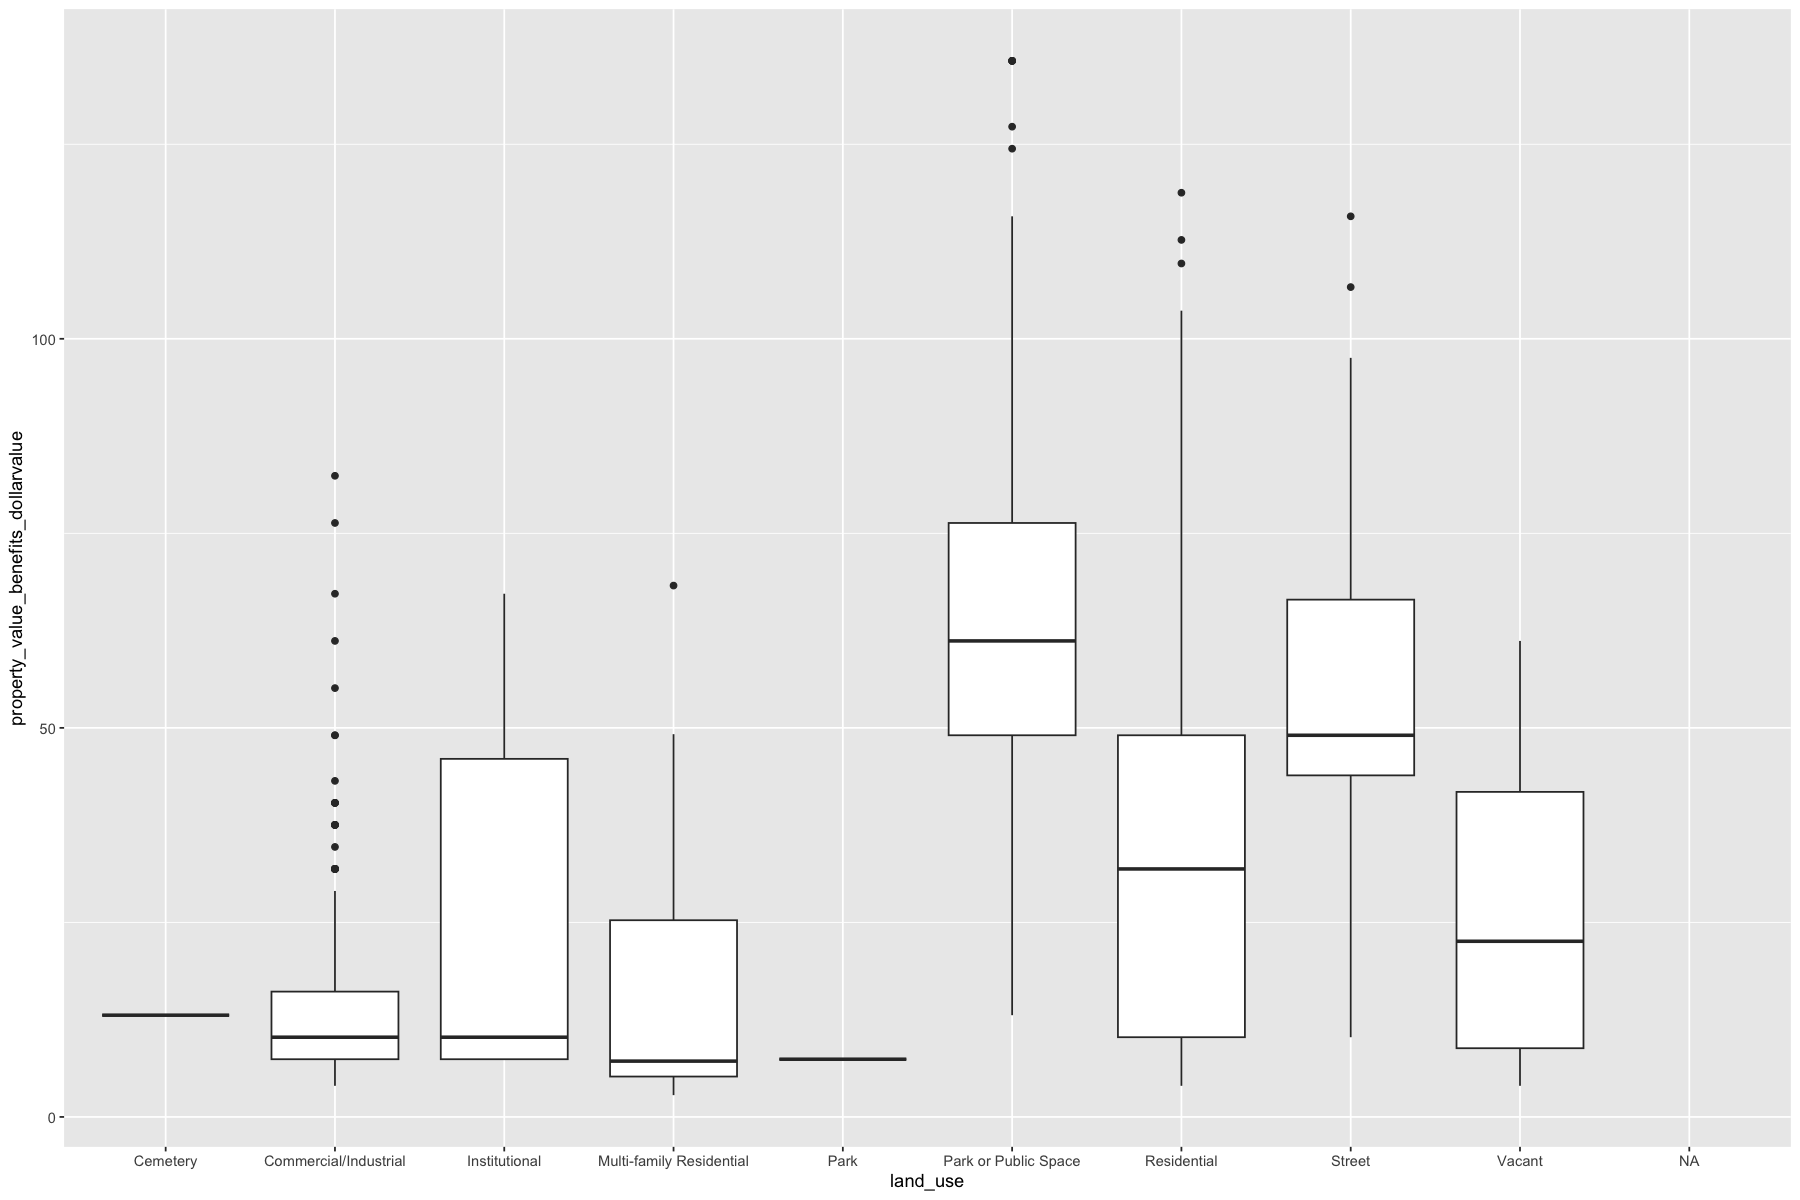

In [17]:
red_maple <- trees %>% filter(common_name == "Ginkgo" & growth_space_area < 100)

# Make Land Use a Factor
red_maple$land_use <- as.factor(red_maple$land_use)
head(red_maple)

# Increase plot size
options(repr.plot.width=15, repr.plot.height=10)
# Create Box Plot
ggplot(red_maple, aes(x = land_use, y = property_value_benefits_dollarvalue)) + geom_boxplot()